In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("fraud-detection.csv")
data.head()

,Unnamed: 0,trans_date_trans_time,trans_num,first,cc_num,merchant,category,amt,last,gender,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 00:00,0b242abb623afc578575680df30655b9,Jennifer,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",03-09-1988,1325376018,36.011293,-82.048315,0
1,1,01-01-2019 00:00,1f76529f8574734946361c461b024d99,Stephanie,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,...,99160,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1325376044,49.159047,-118.186462,0
2,2,01-01-2019 00:00,a1a22d70485983eac12b5b88dad1cf95,Edward,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Sanchez,M,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,1325376051,43.150704,-112.154481,0
3,3,01-01-2019 00:01,6b849c168bdad6f867558c3793159a81,Jeremy,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,White,M,...,59632,46.2306,-112.1138,1939,Patent attorney,01-12-1967,1325376076,47.034331,-112.561071,0
4,4,01-01-2019 00:03,a41d7549acf90789359a9aa5346dcb46,Tyler,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Garcia,M,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,1325376186,38.674999,-78.632459,0


In [3]:
data.describe().T




,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,500.0,2.495000e+02,1.444818e+02,0.000000e+00,1.247500e+02,2.495000e+02,3.742500e+02,4.990000e+02
cc_num,500.0,5.144249e+17,1.431550e+18,6.049559e+10,1.800000e+14,3.530000e+15,4.840000e+15,4.990000e+18
amt,500.0,7.771566e+01,9.731961e+01,1.100000e+00,1.864500e+01,5.766500e+01,9.267500e+01,1.055470e+03
zip,500.0,4.900856e+04,2.736317e+04,1.330000e+03,2.391775e+04,4.818350e+04,7.204200e+04,9.978300e+04
lat,500.0,3.869204e+01,4.951696e+00,2.002710e+01,3.588877e+01,3.970820e+01,4.154883e+01,6.475560e+01
long,500.0,-9.083966e+01,1.493480e+01,-1.656723e+02,-9.807270e+01,-8.776440e+01,-7.980890e+01,-6.795030e+01
city_pop,500.0,7.599493e+04,2.412157e+05,2.300000e+01,7.175000e+02,2.381500e+03,1.535750e+04,1.595797e+06
unix_time,500.0,1.325388e+09,6.971555e+03,1.325376e+09,1.325382e+09,1.325387e+09,1.325394e+09,1.325400e+09
merch_lat,500.0,3.868742e+01,4.993246e+00,1.920921e+01,3.585402e+01,3.948408e+01,4.174346e+01,6.502350e+01
merch_long,500.0,-9.082982e+01,1.497498e+01,-1.661484e+02,-9.798223e+01,-8.772815e+01,-7.958519e+01,-6.852301e+01


In [4]:
data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
trans_num                0
first                    0
cc_num                   0
merchant                 0
category                 0
amt                      0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:


from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['trans_num']=le.fit_transform(data['trans_num'])
data['first']=le.fit_transform(data['first'])
data['trans_date_trans_time']=le.fit_transform(data['trans_date_trans_time'])
data.head()

,Unnamed: 0,trans_date_trans_time,trans_num,first,cc_num,merchant,category,amt,last,gender,...,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,0,24,92,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",03-09-1988,1325376018,36.011293,-82.048315,0
1,1,0,57,180,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,...,99160,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1325376044,49.159047,-118.186462,0
2,2,0,317,65,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Sanchez,M,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,1325376051,43.150704,-112.154481,0
3,3,1,215,93,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,White,M,...,59632,46.2306,-112.1138,1939,Patent attorney,01-12-1967,1325376076,47.034331,-112.561071,0
4,4,2,320,197,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Garcia,M,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,1325376186,38.674999,-78.632459,0


In [6]:
x=data.iloc[:,1:4]
x

,trans_date_trans_time,trans_num,first
0,0,24,92
1,0,57,180
2,0,317,65
3,1,215,93
4,2,320,197
...,...,...,...
495,283,343,53
496,283,417,126
497,284,490,203
498,285,226,109


In [7]:
y=data.iloc[:,-1:]
y

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
495,0
496,0
497,0
498,0


In [8]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:

from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver="liblinear",verbose=2)
print("Training Started.....\n")
print()
log_reg.fit(xtrain,ytrain)
print()
print()
print("Training completed....")
print()
print("Testing invoked")
ypred=log_reg.predict(xtest)
print("predicted Total output\n",ypred)
print('\n Testing is also completed....\n')

Training Started.....


[LibLinear]

Training completed....

Testing invoked
predicted Total output
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

 Testing is also completed....



C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
ytrain

,is_fraud
249,0
433,0
19,0
322,0
332,0
...,...
106,0
270,1
348,0
435,0


In [11]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('********************Performance Measures for Logistic Regression Classification*********')
print('Accuracy Score:\t\n', accuracy_score(ytest, ypred))
print()
print('='*80)
print('Confusion Matrix:\n', confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report: \n', classification_report(ytest,ypred))
print('='*80)

********************Performance Measures for Logistic Regression Classification*********
Accuracy Score:	
 0.9

Confusion Matrix:
 [[90  0]
 [10  0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        90
           1       0.00      0.00      0.00        10

    accuracy                           0.90       100
   macro avg       0.45      0.50      0.47       100
weighted avg       0.81      0.90      0.85       100



C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [12]:
data["is_fraud"].value_counts()

0    447
1     53
Name: is_fraud, dtype: int64

In [14]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)


In [17]:
x_resampled


,trans_date_trans_time,trans_num,first
0,0,24,92
1,0,57,180
2,0,317,65
3,1,215,93
4,2,320,197
...,...,...,...
889,97,315,77
890,44,209,149
891,269,220,116
892,203,456,182


In [18]:
y_resampled


,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
889,1
890,1
891,1
892,1


In [29]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)


In [25]:
x_resampled

,trans_date_trans_time,trans_num,first
317,180,154,111
418,244,231,124
135,76,198,188
431,249,465,189
80,47,210,190
...,...,...,...
465,267,132,71
471,270,444,181
479,275,323,69
481,276,238,144


In [21]:
y_resampled

,is_fraud
317,0
418,0
135,0
431,0
80,0
...,...
465,1
471,1
479,1
481,1


In [31]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

,trans_date_trans_time,trans_num,first
77,45,109,133
83,49,74,41
103,62,329,142
490,279,409,53
450,260,176,192
...,...,...,...
143,81,492,135
437,253,395,173
385,221,460,126
477,274,474,189


In [36]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver="liblinear",verbose=2)
print("Training Started.....\n")
print()
log_reg.fit(xtrain,ytrain)
print()
print()
print("Training completed....")
print()
print("Testing invoked")
ypred=log_reg.predict(xtest)
print("predicted Total output\n",ypred)
print('\n Testing is also completed....\n')

Training Started.....


[LibLinear]

Training completed....

Testing invoked
predicted Total output
 [0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1]

 Testing is also completed....



C:\Users\eluri\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('********************Performance Measures for Logistic Regression Classification*********')
print('Accuracy Score:\t\n', accuracy_score(ytest, ypred))
print()
print('='*80)
print('Confusion Matrix:\n', confusion_matrix(ytest,ypred))
print()
print('='*80)
print('Classification Report: \n', classification_report(ytest,ypred))
print('='*80)

********************Performance Measures for Logistic Regression Classification*********
Accuracy Score:	
 0.4090909090909091

Confusion Matrix:
 [[5 6]
 [7 4]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.42      0.45      0.43        11
           1       0.40      0.36      0.38        11

    accuracy                           0.41        22
   macro avg       0.41      0.41      0.41        22
weighted avg       0.41      0.41      0.41        22



In [43]:
y_resampled["is_fraud"].value_counts()

0    53
1    53
Name: is_fraud, dtype: int64

In [44]:
log_reg.classes_

array([0, 1], dtype=int64)

In [45]:
log_reg.coef_

array([[-0.00070526,  0.00152481,  0.00031748]])

In [47]:
log_reg.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(solver='liblinear', verbose=2)>

In [48]:
log_reg.dual

False

In [50]:
log_reg.feature_names_in_

array(['trans_date_trans_time', 'trans_num', 'first'], dtype=object)

In [51]:
log_reg.fit_intercept

True

In [53]:
log_reg.intercept_

array([-0.30968363])

In [54]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

In [55]:
y_probs=log_reg.predict_proba(xtest)[:,1]
y_probs

array([0.39930859, 0.43996548, 0.50942392, 0.41539652, 0.54021199,
       0.421119  , 0.53346446, 0.56733611, 0.50214916, 0.50595519,
       0.45129675, 0.51576331, 0.45845342, 0.51060918, 0.43656898,
       0.42110907, 0.48471933, 0.48801065, 0.44233042, 0.45127638,
       0.54222037, 0.5356295 ])

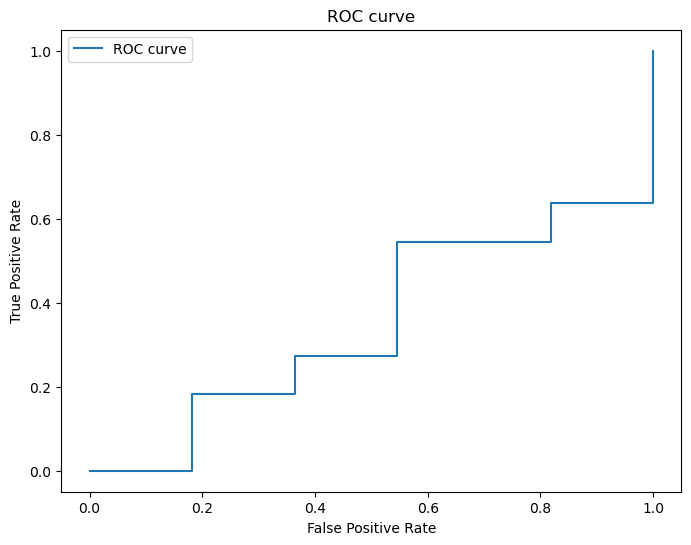

In [56]:
from sklearn.metrics import roc_curve,roc_auc_score,auc
fpr,tpr,thresholds=roc_curve(ytest,y_probs)
roc_curve=auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()

In [57]:
roc_curve

0.3471074380165289